# $C_3$ and $C_6$ Coefficients

The PairInteraction Python API comes with high-level functionality to calculate $C_3$ coefficients (dipole-dipole) and $C_6$ coefficients (van der Waals) without having to write much code. All functionality for calculating the coefficients are provided by the `pi.C3` and `pi.C6` classes:
* The constructor of the classes take the state of interest.
* The `get` method returns the coefficient.
* The classes determine automatically which states should be taken into account to obtain an accurate coefficient. To provide guidance how many states in the pair basis should be considered, you can use the method `set_minimum_number_of_ket_pairs`.
* If the coefficient should be calculated in the presence of e.g. a magnetic field, the `set_magnetic_field` method can be called before getting the coefficient. In general, the classes support similar setters as the `pi.SystemAtom` and `pi.SystemPair` classes.

If you are interested in calculating effective Hamiltonians beyond just the $C_3$ and $C_6$ coefficients, also check out the tutorial [Effective Hamiltonians](./effective_hamiltonian.ipynb).

In [ ]:
%pip install -q matplotlib numpy pairinteraction

import matplotlib.pyplot as plt
import numpy as np
import pairinteraction as pi

if pi.Database.get_global_database() is None:
    pi.Database.initialize_global_database(download_missing=True)

## Quickly get a $C_3$ and $C_6$ coefficient

In the following, we have a minimal example for calculating a $C_3$ and $C_6$ coefficient.

In [3]:
ket1 = pi.KetAtom("Rb", n=61, l=0, j=0.5, m=0.5)
ket2 = pi.KetAtom("Rb", n=62, l=1, j=1.5, m=0.5)

c3 = pi.C3(ket1, ket2).get("MHz um^3")
print(f"C3 coefficient between {ket1} and {ket2}: {c3:.3f} MHz um^3")

c6 = pi.C6(ket1, ket1).get("MHz um^6")
print(f"C6 coefficient of {ket1, ket1}: {c6:.3f} MHz um^6")

C3 coefficient between |Rb:61,S_1/2,1/2⟩ and |Rb:62,P_3/2,1/2⟩: -99.956 MHz um^3
C6 coefficient of (KetAtom(Rb:61,S_1/2,1/2), KetAtom(Rb:61,S_1/2,1/2)): 169208.742 MHz um^6


## Angular dependence of the $C_3$ and $C_6$ coefficient

As a more sophisticated example, we calculate the angular dependence of the coefficients in the presence of a magnetic field along the quantization axis. For the angular dependence of the $C_3$ coefficient, we recover the dipole pattern $1-3\cos (\theta)^2$.

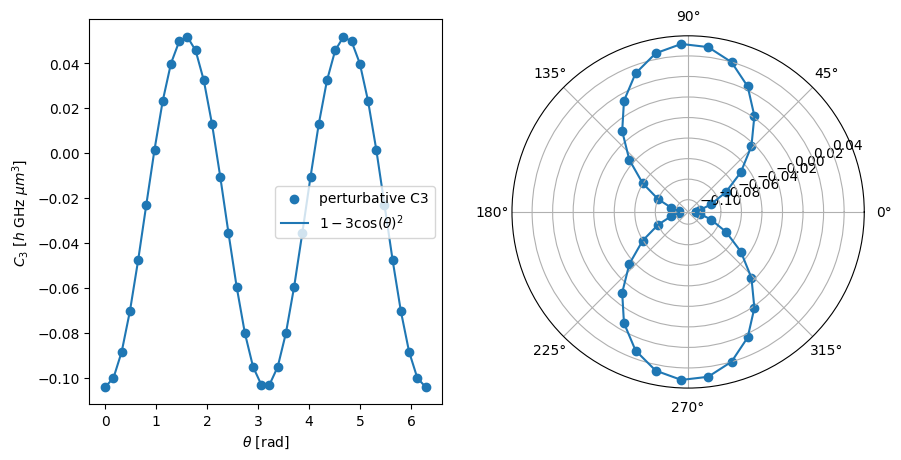

In [ ]:
# Calculate C3 coefficients for different angles
c3_obj = pi.C3(ket1, ket2)
c3_obj.set_diamagnetism_enabled(False)
c3_obj.set_magnetic_field([0, 0, 20], "gauss")

thetas = np.linspace(0, 2 * np.pi, 40)
c3_coeffs = [c3_obj.set_angle(theta, unit="radian").get("GHz um^3") for theta in thetas]

# Plot the results
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[1].remove()
axs[1] = fig.add_subplot(1, 2, 2, projection="polar")

for ax in axs:
    ax.scatter(thetas, c3_coeffs, label="perturbative C3")
    ax.plot(
        thetas,
        -0.5 * c3_coeffs[0] * (1 - 3 * np.cos(thetas) ** 2),
        label=r"$1-3\cos(\theta)^2$",
    )

axs[0].legend()
axs[0].set_xlabel(r"$\theta$ [rad]")
axs[0].set_ylabel(r"$C_3$ [$h$ GHz $\mu m^3$]")

plt.show()

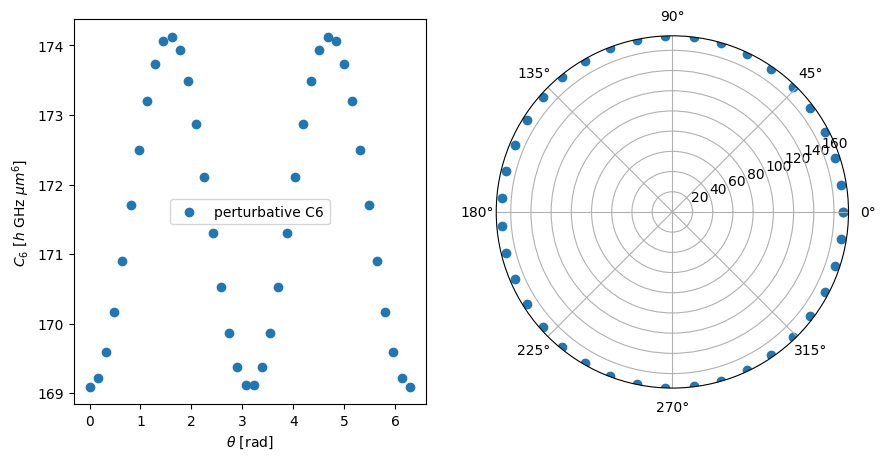

In [ ]:
# Calculate C6 coefficients for different angles
c6_obj = pi.C6(ket1, ket1)
c6_obj.set_diamagnetism_enabled(False)
c6_obj.set_magnetic_field([0, 0, 20], "gauss")

c6_coeffs = [c6_obj.set_angle(theta, unit="radian").get("GHz um^6") for theta in thetas]

# Plot the results
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[1].remove()
axs[1] = fig.add_subplot(1, 2, 2, projection="polar")

for ax in axs:
    ax.scatter(thetas, c6_coeffs, label="perturbative C6")

axs[0].legend()
axs[0].set_xlabel(r"$\theta$ [rad]")
axs[0].set_ylabel(r"$C_6$ [$h$ GHz $\mu m^6$]")

plt.show()